In [ ]:
#K-means Clustering

In [7]:
#1st step to Gather data and crate a dataframe
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.shape

(200, 5)

In [10]:
df.size #tells us the total no of elements in data set

1000

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

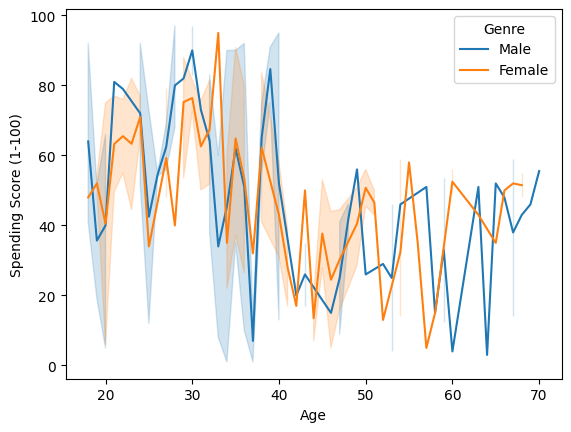

In [11]:
# Visualization of parameters using seaborn
import seaborn as sns
data = pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/Mall_Customers.csv')

# plotting lineplot
sns.lineplot(  hue= data['Genre']  ,x = data['Age'],   y= data['Spending Score (1-100)'] )


In [15]:
#from the plot we can conclude that the age 38 spends the most
#male upto the age of 40 years spends more than female

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

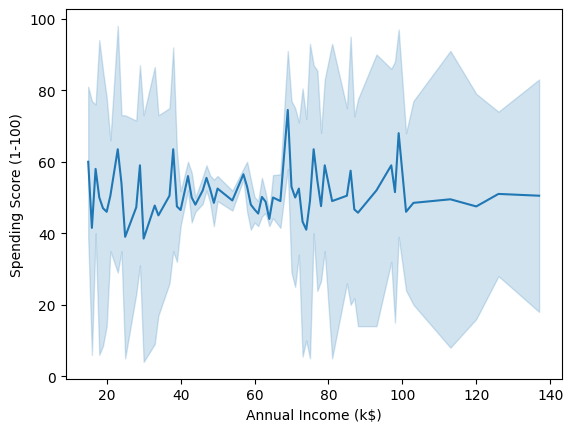

In [12]:
sns.lineplot(  x = data['Annual Income (k$)'],   y= data['Spending Score (1-100)'] )


In [14]:
# from the above visualization we can that the income of 70k$ have maximum spending score

In [36]:
#As from the data weGenre male / female which cannot be used with the integer data so we need preprocessing
encoded_df = pd.get_dummies(df, columns=['Genre'], drop_first=True)
print(encoded_df)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male
0             1   19                  15                      39           1
1             2   21                  15                      81           1
2             3   20                  16                       6           0
3             4   23                  16                      77           0
4             5   31                  17                      40           0
..          ...  ...                 ...                     ...         ...
195         196   35                 120                      79           0
196         197   45                 126                      28           0
197         198   32                 126                      74           1
198         199   32                 137                      18           1
199         200   30                 137                      83           1

[200 rows x 5 columns]


In [37]:
#step 4 dividing into inputs and outputs
#taking AGE ,gender and income as inputs  and spending score as y output
x =encoded_df.loc[:,["Age","Annual Income (k$)","Genre_Male"]].values
x

array([[ 19,  15,   1],
       [ 21,  15,   1],
       [ 20,  16,   0],
       [ 23,  16,   0],
       [ 31,  17,   0],
       [ 22,  17,   0],
       [ 35,  18,   0],
       [ 23,  18,   0],
       [ 64,  19,   1],
       [ 30,  19,   0],
       [ 67,  19,   1],
       [ 35,  19,   0],
       [ 58,  20,   0],
       [ 24,  20,   0],
       [ 37,  20,   1],
       [ 22,  20,   1],
       [ 35,  21,   0],
       [ 20,  21,   1],
       [ 52,  23,   1],
       [ 35,  23,   0],
       [ 35,  24,   1],
       [ 25,  24,   1],
       [ 46,  25,   0],
       [ 31,  25,   1],
       [ 54,  28,   0],
       [ 29,  28,   1],
       [ 45,  28,   0],
       [ 35,  28,   1],
       [ 40,  29,   0],
       [ 23,  29,   0],
       [ 60,  30,   1],
       [ 21,  30,   0],
       [ 53,  33,   1],
       [ 18,  33,   1],
       [ 49,  33,   0],
       [ 21,  33,   0],
       [ 42,  34,   0],
       [ 30,  34,   0],
       [ 36,  37,   0],
       [ 20,  37,   0],
       [ 65,  38,   0],
       [ 24,  38

In [32]:
y =df.iloc[:,4].values
y

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83])

Now , we come to the 2nd part which is to perform ELBOW method to find the nof of clusters
1. to iterate 1- 11 clusters and finding the Elbow plot.
2. Deciding optimal numbers of clusters to be used

In [2]:
from sklearn.cluster import KMeans
wcss = [] # Within cluster sum of square , largest when k = 1

In [20]:
for i in  range(1,11) :
    kmeans = KMeans(n_clusters = i , init='k-means++', random_state = 0) # k-means++ initializes centroid for better clustering
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #formula used to segregate data into clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

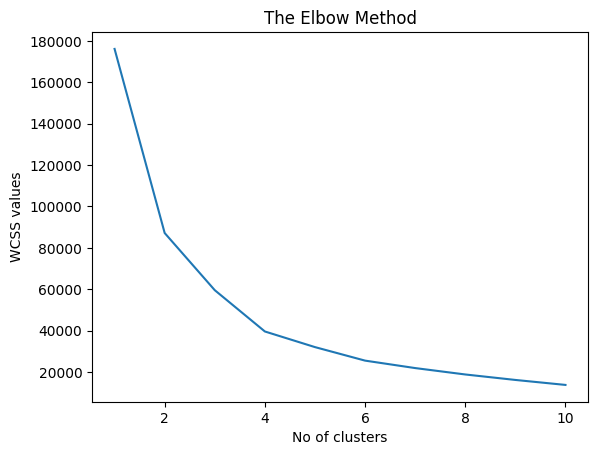

In [22]:
# Plotting the Elbow method
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS values')
plt.show

from the observation we can say that the elbow bends near clusters=5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


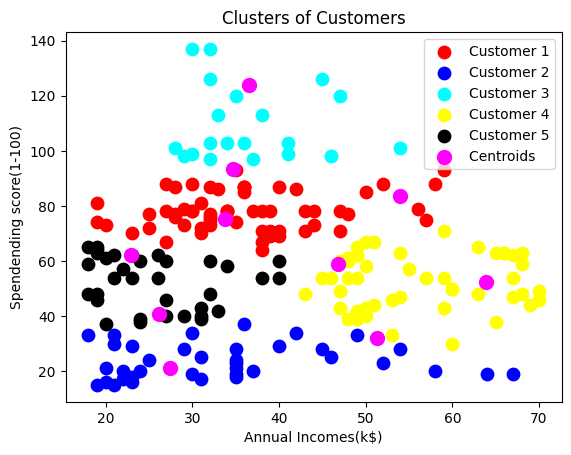

In [29]:
#Training the model using unsupervised algorithm K-means
kmeansmodel= KMeans(n_clusters = 5 ,init = 'k-means++',random_state=0)
y_kmeans =kmeansmodel.fit_predict(x)

 #this will feed the sparse matrix that and 0,0 n 0,1 represent the output of the cluster where c is the size
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 80 ,c = "red" , label = 'Customer 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 80 ,c = "blue" , label = 'Customer 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 80 ,c = "cyan" , label = 'Customer 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s = 80 ,c = "yellow" , label = 'Customer 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s = 80 ,c = "black" , label = 'Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'magenta' , label = 'Centroids ')
  #this will plot the centroids in scatter plot will help to achive better visualization
plt.title('Clusters of Customers')
plt.xlabel('Annual Incomes(k$)')
plt.ylabel('Spendending score(1-100)')
plt.legend() #for better visualization
plt.show()


As from the above plot we can see that customer 4 is  having high salary but less spending score while the customer1 is the main target audience as it is having spending score of 80 and has salary range upto 60k